#### Note: Latest May 21 (7.30pm) - OneHot Encoding (not...still get_dummies). Creating Kelly's 3 breed categories



## Reading in data and taking a quick look at some charts

In [89]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pickle

In [2]:
from sklearn.svm import SVC 
svc = SVC(C=1e-9, kernel='rbf')

In [3]:
# Read in csv
df = pd.read_csv("../Resources/Austin_Animal_Center_Outcomes.csv")

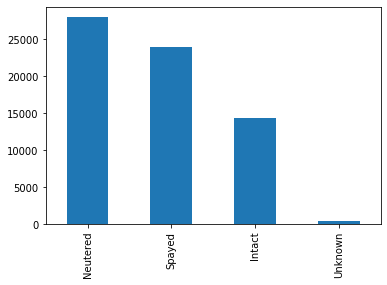

In [4]:
# Take a quick peak at charts

# Top Breeds
# df['Breed'].value_counts().head(20).plot.bar()

# Top Outcome_Types
# df['Breed'].value_counts().head(20).plot.bar()

# Sex split?
# df['Sex'].value_counts().head(20).plot.bar()

# Fixed?
df['Fixed'].value_counts().head(20).plot.bar()

# Age chart
# bins= [0,24,72,120]
# plt.hist(df.Age_month, bins=bins, edgecolor="k")
# plt.xticks(bins)
# plt.show()

In [5]:
df.loc[250:260, :]

,AnimalID,Name,DateTime,MonthYear,DateofBirth,OutcomeType,OutcomeSubtype,Fixed,Sex,Age_numeric,Age_time,AgeMonth,Breed,Color
250,A809527,*Cricket,12/11/2019 16:17,12/11/2019 16:17,10/18/2019,Adoption,Foster,Spayed,Female,1,month,1.0,Labrador Retriever Mix,Black/White
251,A797472,NaN,06/13/2019 06:59:00 PM,06/13/2019 06:59:00 PM,04/24/2019,Transfer,Partner,Intact,Female,1,month,1.0,Chihuahua Longhair Mix,Black/Tan
252,A742456,*Arrow,02/14/2017 06:27:00 PM,02/14/2017 06:27:00 PM,12/22/2016,Adoption,Foster,Spayed,Female,1,month,1.0,Pit Bull Mix,Brown/Black
253,A721330,*Glen,3/5/2016 17:40,3/5/2016 17:40,1/9/2016,Adoption,Foster,Neutered,Male,1,month,1.0,German Shepherd Mix,Tan
254,A697339,NaN,02/23/2015 06:36:00 PM,02/23/2015 06:36:00 PM,12/30/2014,Adoption,NaN,Spayed,Female,1,month,1.0,German Shepherd/Pit Bull,Brown
255,A695918,Clementine,01/29/2015 05:59:00 PM,01/29/2015 05:59:00 PM,11/30/2014,Adoption,NaN,Spayed,Female,1,month,1.0,Dachshund/Chihuahua Shorthair,Black/White
256,A809888,NaN,12/4/2019 12:05,12/4/2019 12:05,10/19/2019,Transfer,Partner,Intact,Female,1,month,1.0,Labrador Retriever/German Shepherd,Brown/White
257,A774855,NaN,7/10/2018 19:10,7/10/2018 19:10,05/21/2018,Transfer,Partner,Intact,Male,1,month,1.0,Australian Kelpie Mix,Brown/White
258,A750857,*Cinder,07/28/2017 10:37:00 PM,07/28/2017 10:37:00 PM,6/1/2017,Adoption,Foster,Spayed,Female,1,month,1.0,Great Pyrenees/American Bulldog,Black/White
259,A762939,NaN,11/30/2017 12:00:00 AM,11/30/2017 12:00:00 AM,09/30/2017,Transfer,Partner,Intact,Female,1,month,1.0,Pit Bull Mix,Brown/White


In [6]:
df.shape

(66804, 14)

## Cleaning
1. Drop unnessary columns
2. Drop rows where "Outcome_Type" is null
3. Drop rows where "Outcome_Type" is Return_To_Owner

In [7]:
# Quick check for missing values
df.apply(lambda x: sum(x.isnull()/len(df)))

AnimalID          0.000000
Name              0.169496
DateTime          0.000000
MonthYear         0.000000
DateofBirth       0.000000
OutcomeType       0.000000
OutcomeSubtype    0.688567
Fixed             0.000015
Sex               0.005673
Age_numeric       0.000000
Age_time          0.000000
AgeMonth          0.000000
Breed             0.000000
Color             0.000000
dtype: float64

In [8]:
# Drop unnessary columns
df2 = df.drop(columns=['AnimalID', 'Name', 'DateTime', 'MonthYear', 'DateofBirth', 'OutcomeSubtype', 
                       'Age_numeric', 'Age_time' ])

In [9]:
df2.shape
# df2.head()

(66804, 6)

In [10]:
# Drop rows where Outcome_Type is null

df2 = df2.loc[df2.OutcomeType.notna(), ["OutcomeType", "Sex", "AgeMonth", "Breed" ,"Color"]]

In [11]:
# Check for more nulls
df2.head()
df2.apply(lambda x: sum(x.isnull()/len(df2)))
df2.shape

(66804, 5)

In [12]:
# Have to fix the following columns "Sex"
df2 = df2.dropna(axis=0, subset=["Sex"])

In [13]:
# Verify that nulls from "Fixed" and "Sex" have been dropped
df2.apply(lambda x: sum(x.isnull()/len(df2)))
df2.shape

(66425, 5)

In [14]:
# # df2.groupby('Outcome_Type').count()
# df2.groupby('Color').count().sort_values('Outcome_Type', ascending=False)

In [15]:
# Drop all rows 'Return to Owner' ???  Assuming that chip is checked at intake

df3 = df2.drop(df2[df2.OutcomeType == "Return to Owner"].index)

In [16]:
# Verify shape
df3.shape

(48025, 5)

In [17]:
# Verify group by counts (Return to Owner should be gone)
df3.groupby('OutcomeType').count()

,Sex,AgeMonth,Breed,Color
OutcomeType,,,,
Adoption,31395,31395,31395,31395
Died,209,209,209,209
Disposal,22,22,22,22
Euthanasia,1694,1694,1694,1694
Missing,29,29,29,29
Rto-Adopt,498,498,498,498
Transfer,14178,14178,14178,14178


In [18]:
# Anymore missing values before we move on?  If zero, then we are good.
df3.apply(lambda x: sum(x.isnull()/len(df3)))

OutcomeType    0.0
Sex            0.0
AgeMonth       0.0
Breed          0.0
Color          0.0
dtype: float64

In [19]:
df3.shape

(48025, 5)

## Add new features?
1. New feature? - Mixed/Pure Breed? - COMPLETED!! 
2. Split breeds - COMPLETED!!
3. Color -  We have 333 unique color combinations. Hot encoding "Color" will create additional X features if we didn't do anything.  This would be unlikely to create a good performing model.
    *  Option 1 - We take any values occurring fewer than 300 times and places them into the “other” label. We use this to create a new feature called “Top_colors”.  Doing this would reduce 333 unique colors to 30 unique values - COMPLETED!
    *  Option 2 - Split to primary color vs secondary color? - COMPLETED!
4. Creating age groups - COMPLETED!!
5. Breeds - Hot encoding "Breed" will create additional 1,380 new features if we didn't do anything.  
6. New feature? - Single color/Multi color?

#### Creating a Mix/Pure Breed column - As of May 20 9pm, MIX doesn't do anything cause assuming all breeds are mixed.
#### As of May 21 - Creating Kelly's 3 breed categories: 0 = mix, secondary not listed ; 1 = secondary breed listed; 2 = purebred

1. Create new MIX column (Kelly's 3 categories)
2. Split breed into breed_primary and breed_second


#### solution - Creating a Breed_category column AND Split into Breed_primary/Breed_second
* 0 = Breed has the word "Mix"
* 1 = If there are 2 breeds listed
* 2 = Only 1 breed in the primary (i.e. None in secondary OR Pure)

In [20]:
# Make a copy and add new column called Breed_category, set all to PURE
df4 = df3.copy()
df4["BreedCategory"]= "Pure"
df4.head()

,OutcomeType,Sex,AgeMonth,Breed,Color,BreedCategory
0,Adoption,Female,1.000000,Border Collie Mix,Chocolate/White,Pure
1,Transfer,Male,0.066667,German Shepherd Mix,Brown,Pure
2,Transfer,Male,0.066667,Labrador Retriever Mix,Black/White,Pure
4,Transfer,Female,0.066667,Dachshund Mix,Brown,Pure
6,Transfer,Female,0.066667,Pit Bull Mix,Chocolate/White,Pure


In [21]:
df4.head()

,OutcomeType,Sex,AgeMonth,Breed,Color,BreedCategory
0,Adoption,Female,1.000000,Border Collie Mix,Chocolate/White,Pure
1,Transfer,Male,0.066667,German Shepherd Mix,Brown,Pure
2,Transfer,Male,0.066667,Labrador Retriever Mix,Black/White,Pure
4,Transfer,Female,0.066667,Dachshund Mix,Brown,Pure
6,Transfer,Female,0.066667,Pit Bull Mix,Chocolate/White,Pure


In [22]:
df4.loc[200:210, :]

,OutcomeType,Sex,AgeMonth,Breed,Color,BreedCategory
200,Transfer,Female,0.2,Dachshund,Tan,Pure
201,Transfer,Male,0.2,Dachshund,Tan,Pure
205,Transfer,Female,0.2,German Shepherd/Rottweiler,Brown/Black,Pure
206,Transfer,Female,0.2,Labrador Retriever/Pit Bull,Brown Brindle,Pure
208,Transfer,Female,0.2,Rat Terrier Mix,White,Pure
209,Transfer,Female,0.2,Labrador Retriever/Pit Bull,Brown Brindle/White,Pure
210,Transfer,Male,0.2,Rat Terrier Mix,White,Pure


In [23]:
# Split Primary and Secondary
df4[['BreedPrimary','BreedSecond']] = df4.Breed.str.split("/", n=1, expand=True) 

In [24]:
df4.loc[200:210, :]

,OutcomeType,Sex,AgeMonth,Breed,Color,BreedCategory,BreedPrimary,BreedSecond
200,Transfer,Female,0.2,Dachshund,Tan,Pure,Dachshund,None
201,Transfer,Male,0.2,Dachshund,Tan,Pure,Dachshund,None
205,Transfer,Female,0.2,German Shepherd/Rottweiler,Brown/Black,Pure,German Shepherd,Rottweiler
206,Transfer,Female,0.2,Labrador Retriever/Pit Bull,Brown Brindle,Pure,Labrador Retriever,Pit Bull
208,Transfer,Female,0.2,Rat Terrier Mix,White,Pure,Rat Terrier Mix,None
209,Transfer,Female,0.2,Labrador Retriever/Pit Bull,Brown Brindle/White,Pure,Labrador Retriever,Pit Bull
210,Transfer,Male,0.2,Rat Terrier Mix,White,Pure,Rat Terrier Mix,None


In [25]:
# Find rows containing word "Mix" and set to 0
df4.loc[df4["Breed"].str.contains("Mix"), "BreedCategory"] = "Mix"

In [26]:
df4.loc[200:210, :]

,OutcomeType,Sex,AgeMonth,Breed,Color,BreedCategory,BreedPrimary,BreedSecond
200,Transfer,Female,0.2,Dachshund,Tan,Pure,Dachshund,None
201,Transfer,Male,0.2,Dachshund,Tan,Pure,Dachshund,None
205,Transfer,Female,0.2,German Shepherd/Rottweiler,Brown/Black,Pure,German Shepherd,Rottweiler
206,Transfer,Female,0.2,Labrador Retriever/Pit Bull,Brown Brindle,Pure,Labrador Retriever,Pit Bull
208,Transfer,Female,0.2,Rat Terrier Mix,White,Mix,Rat Terrier Mix,None
209,Transfer,Female,0.2,Labrador Retriever/Pit Bull,Brown Brindle/White,Pure,Labrador Retriever,Pit Bull
210,Transfer,Male,0.2,Rat Terrier Mix,White,Mix,Rat Terrier Mix,None


In [27]:
# Find rows containing word "/" and set to 1
df4.loc[df4["Breed"].str.contains("\/"), "BreedCategory"] = "Two"

In [28]:
df4.loc[200:210, :]

,OutcomeType,Sex,AgeMonth,Breed,Color,BreedCategory,BreedPrimary,BreedSecond
200,Transfer,Female,0.2,Dachshund,Tan,Pure,Dachshund,None
201,Transfer,Male,0.2,Dachshund,Tan,Pure,Dachshund,None
205,Transfer,Female,0.2,German Shepherd/Rottweiler,Brown/Black,Two,German Shepherd,Rottweiler
206,Transfer,Female,0.2,Labrador Retriever/Pit Bull,Brown Brindle,Two,Labrador Retriever,Pit Bull
208,Transfer,Female,0.2,Rat Terrier Mix,White,Mix,Rat Terrier Mix,None
209,Transfer,Female,0.2,Labrador Retriever/Pit Bull,Brown Brindle/White,Two,Labrador Retriever,Pit Bull
210,Transfer,Male,0.2,Rat Terrier Mix,White,Mix,Rat Terrier Mix,None


In [29]:
# df4.groupby(['Mix']).count().sort_values("Breed", ascending=False).head(10)
# df4['Breed'].str.count('\/').sum()

In [30]:
# Double checking slashes with isalpha() - About the same number.  Off by 2 
# removing white spaces 
# df4["Breed"]= df4["Breed"].str.replace(" ", "") 
# df4.loc[180:190, :]


In [31]:
# creating bool series with new column 
# df4["bool_series2"]= df4["Breed"].str.isalpha()
# df4.loc[180:190, :]
# df4.groupby(['bool_series2']).count()

In [32]:
# print(f'Pure breed: {48025-34048-8480}')

In [33]:
# # Rename the breed WITHOUT the word MIX
# df4.loc[df4['Breed'].str.contains('Mix'), 'Breed'] = df4.loc[df4['Breed'].str.contains('Mix'), 'Breed'].str.replace(' Mix', '')

In [34]:
# How many unique breed combinations before split?
# Breed column - 1854

# How many unique breed combinations AFTER split?
# Breed_primary - 371
# Breed_second - 163

# len(df4.Breed_second.value_counts())

In [35]:
# breed_top10primary = [x for x in df4.Breed_primary.value_counts().sort_values(ascending=False).head(15).index]
# breed_top10primary

# df4.Breed_primary.value_counts().sort_values(ascending=False).head(15)

In [36]:
# breed_top10second = [x for x in df4.Breed_second.value_counts().sort_values(ascending=False).tail(10).index]
# breed_top10second

# df4.Breed_second.value_counts().sort_values(ascending=False).head(10)

#### Handling Color - Selecting colors > 1200
* How does option1 effect RF/LogReg models?


In [37]:
df4.head()

,OutcomeType,Sex,AgeMonth,Breed,Color,BreedCategory,BreedPrimary,BreedSecond
0,Adoption,Female,1.000000,Border Collie Mix,Chocolate/White,Mix,Border Collie Mix,None
1,Transfer,Male,0.066667,German Shepherd Mix,Brown,Mix,German Shepherd Mix,None
2,Transfer,Male,0.066667,Labrador Retriever Mix,Black/White,Mix,Labrador Retriever Mix,None
4,Transfer,Female,0.066667,Dachshund Mix,Brown,Mix,Dachshund Mix,None
6,Transfer,Female,0.066667,Pit Bull Mix,Chocolate/White,Mix,Pit Bull Mix,None


In [38]:
# How many unique color combinations?  - 333
color_counts = df4['Color'].value_counts()
# len(color_counts)
print(df4['Color'].nunique())
color_counts.head(20)

333


Black/White            5911
Tan/White              2695
Brown/White            2655
Black                  2504
White                  2345
Tan                    2231
Tricolor               1957
Black/Tan              1903
Brown                  1877
White/Black            1721
Black/Brown            1645
White/Brown            1549
Brown Brindle/White    1426
Blue/White             1329
White/Tan              1296
Brown/Black            1256
Red                     914
Red/White               876
Tan/Black               788
Brown Brindle           757
Name: Color, dtype: int64

In [39]:
# # Handling "Color" Option 1
color_others = set(color_counts[color_counts < 1200].index)
df4['Top_colors'] = df4['Color'].replace(list(color_others), 'Others')
print(df4['Top_colors'].nunique())

17


In [40]:
df4.head()


,OutcomeType,Sex,AgeMonth,Breed,Color,BreedCategory,BreedPrimary,BreedSecond,Top_colors
0,Adoption,Female,1.000000,Border Collie Mix,Chocolate/White,Mix,Border Collie Mix,None,Others
1,Transfer,Male,0.066667,German Shepherd Mix,Brown,Mix,German Shepherd Mix,None,Brown
2,Transfer,Male,0.066667,Labrador Retriever Mix,Black/White,Mix,Labrador Retriever Mix,None,Black/White
4,Transfer,Female,0.066667,Dachshund Mix,Brown,Mix,Dachshund Mix,None,Brown
6,Transfer,Female,0.066667,Pit Bull Mix,Chocolate/White,Mix,Pit Bull Mix,None,Others


In [41]:
# # Add new column called Color_new and set to Color
# df5 = df4.copy()
# df5["Color_new"]=df4["Color"]
# df5.head()
# df5.loc[320:330, :]

In [42]:
# Can't do this code here.  It takes COMBI tan/white and changes that to tan!  WRONG!!  I only want tan column


# Find rows containing colors: Gold/Yellow/Tan/Fawn/Buff/Apricot/Cream and set all to YELLOW
# df5.loc[df5["Color"].str.contains('Gold|Yellow|Tan|Fawn|Buff|Apricot|Cream'), "Color_new"] = "Tan"
# df5.loc[264:267, :]

#### Handling Color - Option 2 (Split and have intaker check all colors that apply) - As of May 22, NOT doing color split
* How does option2 effect RF/LogReg models?

In [43]:
# Split Top_color column into color1, color2
# df3[['Color1','Color2']] = df3.Color.str.split("/", n=1, expand=True) 

In [44]:
# df3.loc[150:160, :]

In [45]:
# How many unique colors? - 333 unique color combinations
# df4.Color.value_counts().sort_values(ascending=False).head(20)
# len(df3.Color.value_counts())

# # How many unique colors in COLOR1? - 37
# len(df3.Color1.value_counts())

# How many unique colors in COLOR2? - 34
# len(df3.Color2.value_counts())

In [46]:
# color_top10Color1 = [x for x in df3.Color1.value_counts().sort_values(ascending=False).head(30).index]
# color_top10Color1

# df3.Color1.value_counts().sort_values(ascending=False).head(40)

In [47]:
# color_top10Color2 = [x for x in df3.Color2.value_counts().sort_values(ascending=False).head(10).index]
# color_top10Color2

# df3.Color2.value_counts().sort_values(ascending=False).head(40)

#### Creating age categories
* Baby: <=6months
* Young: 7months-24 months
* Adult: 2 years-7years
* Senior: 7+

In [48]:
df4['PetAgeCategory'] = pd.cut(x=df4['AgeMonth'], bins=[0, 6, 24, 84,240], labels=['Baby', 'Young', 'Adult', 'Senior'])

In [49]:
df4.loc[50000:50020, :]
df4.tail()

,OutcomeType,Sex,AgeMonth,Breed,Color,BreedCategory,BreedPrimary,BreedSecond,Top_colors,PetAgeCategory
66772,Euthanasia,Male,216.0,Miniature Schnauzer Mix,Gray,Mix,Miniature Schnauzer Mix,None,Others,Senior
66774,Adoption,Male,216.0,Chihuahua Longhair Mix,White/Tan,Mix,Chihuahua Longhair Mix,None,White/Tan,Senior
66786,Euthanasia,Female,228.0,Miniature Poodle,White,Pure,Miniature Poodle,None,White,Senior
66787,Transfer,Male,228.0,Chihuahua Shorthair Mix,Brown,Mix,Chihuahua Shorthair Mix,None,Brown,Senior
66790,Euthanasia,Female,228.0,Chihuahua Longhair/Miniature Poodle,White,Two,Chihuahua Longhair,Miniature Poodle,White,Senior


In [50]:
# What's the breakdown by Pet_age_category after binning??
df4.PetAgeCategory.value_counts().sort_values(ascending=False).head(10)

Young     22342
Baby      13355
Adult      9249
Senior     3077
Name: PetAgeCategory, dtype: int64

## Changing to Binary Outcome - Take the dog or Don't take the dog?
* Positive Outcome is Adoption - Take in the dog
* Negative Outcome is a combination of Transfer, Euthanized and Death categories - Don't take in the dog

In [51]:
# Create new BINARY_OUTCOME column and set to 0

df4["BinaryOutcome"]= "No"
df4.head()

,OutcomeType,Sex,AgeMonth,Breed,Color,BreedCategory,BreedPrimary,BreedSecond,Top_colors,PetAgeCategory,BinaryOutcome
0,Adoption,Female,1.000000,Border Collie Mix,Chocolate/White,Mix,Border Collie Mix,None,Others,Baby,No
1,Transfer,Male,0.066667,German Shepherd Mix,Brown,Mix,German Shepherd Mix,None,Brown,Baby,No
2,Transfer,Male,0.066667,Labrador Retriever Mix,Black/White,Mix,Labrador Retriever Mix,None,Black/White,Baby,No
4,Transfer,Female,0.066667,Dachshund Mix,Brown,Mix,Dachshund Mix,None,Brown,Baby,No
6,Transfer,Female,0.066667,Pit Bull Mix,Chocolate/White,Mix,Pit Bull Mix,None,Others,Baby,No


In [52]:
# Find rows containing word "Adoption" and set to 1 (for Positive Outcome)
# All other rows will be 0 (for Negative Outcome)

df4.loc[df4["OutcomeType"].str.contains("Adoption"), "BinaryOutcome"] = "Yes"

In [53]:
df4.loc[200:300, :]

,OutcomeType,Sex,AgeMonth,Breed,Color,BreedCategory,BreedPrimary,BreedSecond,Top_colors,PetAgeCategory,BinaryOutcome
200,Transfer,Female,0.2,Dachshund,Tan,Pure,Dachshund,None,Tan,Baby,No
201,Transfer,Male,0.2,Dachshund,Tan,Pure,Dachshund,None,Tan,Baby,No
205,Transfer,Female,0.2,German Shepherd/Rottweiler,Brown/Black,Two,German Shepherd,Rottweiler,Brown/Black,Baby,No
206,Transfer,Female,0.2,Labrador Retriever/Pit Bull,Brown Brindle,Two,Labrador Retriever,Pit Bull,Others,Baby,No
208,Transfer,Female,0.2,Rat Terrier Mix,White,Mix,Rat Terrier Mix,None,White,Baby,No
...,...,...,...,...,...,...,...,...,...,...,...
296,Transfer,Female,1.0,German Shepherd Mix,Brown,Mix,German Shepherd Mix,None,Brown,Baby,No
297,Transfer,Male,1.0,Australian Cattle Dog Mix,Cream/Brown Merle,Mix,Australian Cattle Dog Mix,None,Others,Baby,No
298,Adoption,Female,1.0,Labrador Retriever Mix,Tan,Mix,Labrador Retriever Mix,None,Tan,Baby,Yes
299,Transfer,Male,1.0,Jack Russell Terrier Mix,Sable,Mix,Jack Russell Terrier Mix,None,Others,Baby,No


## OneHot Encoding

In [54]:
df4.head()

,OutcomeType,Sex,AgeMonth,Breed,Color,BreedCategory,BreedPrimary,BreedSecond,Top_colors,PetAgeCategory,BinaryOutcome
0,Adoption,Female,1.000000,Border Collie Mix,Chocolate/White,Mix,Border Collie Mix,None,Others,Baby,Yes
1,Transfer,Male,0.066667,German Shepherd Mix,Brown,Mix,German Shepherd Mix,None,Brown,Baby,No
2,Transfer,Male,0.066667,Labrador Retriever Mix,Black/White,Mix,Labrador Retriever Mix,None,Black/White,Baby,No
4,Transfer,Female,0.066667,Dachshund Mix,Brown,Mix,Dachshund Mix,None,Brown,Baby,No
6,Transfer,Female,0.066667,Pit Bull Mix,Chocolate/White,Mix,Pit Bull Mix,None,Others,Baby,No


In [55]:
# Drop these columns:
# Outcome_Type column since we now have Binary_outcome 
# Age_month since we have Pet_age_category
# Breed since we have Breed_primary, Breed_second     - SHOULD BE DROP BREED_SECOND??
# Color since we have Color1, Color2

df5 = df4.drop(columns=['OutcomeType','AgeMonth', 'Breed', 'Color','BreedSecond' ])

In [56]:
# Check null values

df5.apply(lambda x: sum(x.isnull()/len(df5)))

Sex               0.000000
BreedCategory     0.000000
BreedPrimary      0.000000
Top_colors        0.000000
PetAgeCategory    0.000042
BinaryOutcome     0.000000
dtype: float64

In [57]:
# Fixing issues by dropping rows with null values
df5 = df5.dropna(axis=0, subset=["PetAgeCategory"])

In [58]:

df5.apply(lambda x: sum(x.isnull()/len(df5)))

Sex               0.0
BreedCategory     0.0
BreedPrimary      0.0
Top_colors        0.0
PetAgeCategory    0.0
BinaryOutcome     0.0
dtype: float64

In [59]:
df5.head()

,Sex,BreedCategory,BreedPrimary,Top_colors,PetAgeCategory,BinaryOutcome
0,Female,Mix,Border Collie Mix,Others,Baby,Yes
1,Male,Mix,German Shepherd Mix,Brown,Baby,No
2,Male,Mix,Labrador Retriever Mix,Black/White,Baby,No
4,Female,Mix,Dachshund Mix,Brown,Baby,No
6,Female,Mix,Pit Bull Mix,Others,Baby,No


In [60]:
#  encoding of categorical features
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)


In [61]:
X = df5.drop(['BinaryOutcome' ], axis='columns')

In [62]:
X.head()

,Sex,BreedCategory,BreedPrimary,Top_colors,PetAgeCategory
0,Female,Mix,Border Collie Mix,Others,Baby
1,Male,Mix,German Shepherd Mix,Brown,Baby
2,Male,Mix,Labrador Retriever Mix,Black/White,Baby
4,Female,Mix,Dachshund Mix,Brown,Baby
6,Female,Mix,Pit Bull Mix,Others,Baby


In [63]:
# use when different features need different preprocessing
from sklearn.compose import make_column_transformer
#  encoding of categorical features
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

In [64]:
column_trans = make_column_transformer(
    (OneHotEncoder(), ['Sex', 'BreedCategory','BreedPrimary', 'PetAgeCategory','Top_colors']),
    remainder='passthrough')

In [65]:
X = column_trans.fit_transform(X)

In [66]:
df5["BinaryOutcome"].isnull()

0        False
1        False
2        False
4        False
6        False
         ...  
66772    False
66774    False
66786    False
66787    False
66790    False
Name: BinaryOutcome, Length: 48023, dtype: bool

In [67]:
y = ohe.fit_transform(df5[['BinaryOutcome']])
# print(y)
# y = df5[['Binary_outcome']]


## Neural Network

#### 1 layer


In [68]:
import tensorflow
tensorflow.keras.__version__

'2.2.4-tf'

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [70]:
 X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)

In [71]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=200, activation='relu', input_dim=397))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

In [72]:
 # Compile and fit the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [73]:
 model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               79600     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 102       
Total params: 104,852
Trainable params: 104,852
Non-trainable params: 0
_________________________________________________________________


In [74]:
X_train.shape
X_train = X_train.toarray()

In [75]:
y_train.shape

(36017, 2)

In [76]:
 model.fit(
    X_train,
    y_train,
    epochs=60,
    shuffle=True,
    verbose = 2
)

Train on 36017 samples
Epoch 1/60
36017/36017 - 5s - loss: 0.6329 - accuracy: 0.6596
Epoch 2/60
36017/36017 - 3s - loss: 0.6223 - accuracy: 0.6678
Epoch 3/60
36017/36017 - 3s - loss: 0.6152 - accuracy: 0.6741
Epoch 4/60
36017/36017 - 4s - loss: 0.6082 - accuracy: 0.6778
Epoch 5/60
36017/36017 - 5s - loss: 0.5999 - accuracy: 0.6832
Epoch 6/60
36017/36017 - 5s - loss: 0.5909 - accuracy: 0.6902
Epoch 7/60
36017/36017 - 4s - loss: 0.5826 - accuracy: 0.6964
Epoch 8/60
36017/36017 - 4s - loss: 0.5739 - accuracy: 0.7003
Epoch 9/60
36017/36017 - 3s - loss: 0.5655 - accuracy: 0.7041
Epoch 10/60
36017/36017 - 4s - loss: 0.5586 - accuracy: 0.7088
Epoch 11/60
36017/36017 - 3s - loss: 0.5520 - accuracy: 0.7121
Epoch 12/60
36017/36017 - 3s - loss: 0.5452 - accuracy: 0.7146
Epoch 13/60
36017/36017 - 4s - loss: 0.5408 - accuracy: 0.7161
Epoch 14/60
36017/36017 - 4s - loss: 0.5358 - accuracy: 0.7166
Epoch 15/60
36017/36017 - 3s - loss: 0.5313 - accuracy: 0.7196
Epoch 16/60
36017/36017 - 5s - loss: 0.52

#### Quantify model with 1 layer

In [77]:
# X_test = X_test.toarray()


In [78]:

# model_loss, model_accuracy = model.evaluate(
#     X_test, y_test, verbose=2)
# print(
#     f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

#### Adding 2nd layer

In [79]:
# # Create model and add layers
# model2 = Sequential()
# model2.add(Dense(units=100, activation='relu', input_dim=397))
# model2.add(Dense(units=100, activation='relu'))
# model2.add(Dense(units=2, activation='softmax'))

#  # Compile and fit the model
# model2.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

In [80]:
#  model2.summary()

In [81]:
#  model2.fit(
#     X_train,
#     y_train,
#     epochs=60,
#     shuffle=True
# )

In [82]:
# model_loss, model_accuracy = model2.evaluate(
#     X_test, y_test, verbose=2)
# print(
#     f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

#### Adding 3rd layer

In [83]:
# # Create model and add layers
# model3 = Sequential()
# model3.add(Dense(units=100, activation='relu', input_dim=397))
# model3.add(Dense(units=100, activation='relu'))
# model3.add(Dense(units=100, activation='relu'))
# model3.add(Dense(units=2, activation='softmax'))

#  # Compile and fit the model
# model3.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

In [84]:
#  model3.summary()

In [85]:
#  model3.fit(
#     X_train,
#     y_train,
#     epochs=60,
#     shuffle=True
# )

In [87]:
X_test = X_test.toarray()

In [88]:

model_loss, model_accuracy = model.evaluate(
    X_test, y_test, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

12006/12006 - 1s - loss: 1.1613 - accuracy: 0.6479
Normal Neural Network - Loss: 1.1612745796901354, Accuracy: 0.6479260325431824
